In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

pd.options.display.max_rows = 10

In [2]:
countries = gpd.read_file("ne_110m_admin_0_countries.shp")


In [3]:
pip install Fiona

Note: you may need to restart the kernel to use updated packages.


In [4]:
countries.head

<bound method NDFrame.head of           featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE                       

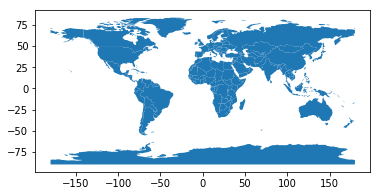

In [5]:
countries.plot()

In [6]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [7]:
countries.geometry


0      (POLYGON ((180 -16.06713266364245, 180 -16.555...
1      POLYGON ((33.90371119710453 -0.950000000000000...
2      POLYGON ((-8.665589565454809 27.65642588959236...
3      (POLYGON ((-122.84 49.00000000000011, -122.974...
4      (POLYGON ((-122.84 49.00000000000011, -120 49....
                             ...                        
172    POLYGON ((18.82982479287395 45.90887235802528,...
173    POLYGON ((20.07070000000004 42.58863000000008,...
174    POLYGON ((20.59024654668023 41.85540891928363,...
175    POLYGON ((-61.68000000000001 10.76, -61.105 10...
176    POLYGON ((30.83385242171543 3.509171604222463,...
Name: geometry, Length: 177, dtype: object

In [8]:
type(countries.geometry)


geopandas.geoseries.GeoSeries

In [9]:
countries.geometry.area


0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

In [11]:
countries['POP_EST'].mean()

41712369.84180791

In [13]:
africa = countries[countries['CONTINENT'] == 'Africa']

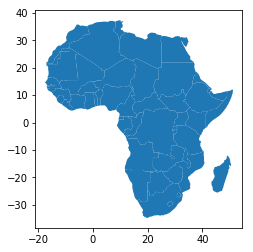

In [14]:
africa.plot()

In [15]:
print(countries.geometry[2])


POLYGON ((-8.665589565454809 27.65642588959236, -8.665124477564191 27.58947907155823, -8.684399786809053 27.39574412689601, -8.6872936670174 25.88105621998891, -11.96941891117116 25.93335276946827, -11.93722449385332 23.37459422453617, -12.87422156416958 23.28483226164518, -13.11875444177471 22.77122020109626, -12.92910193526353 21.32707062426756, -16.84519365077399 21.33332347257488, -17.06342322434257 20.99975210213083, -17.02042843267577 21.42231028898158, -17.00296179856109 21.42073415779658, -14.75095455571353 21.50060008390366, -14.63083268885107 21.8609398462749, -14.22116777185725 22.31016307218816, -13.89111039880905 23.6910090194593, -12.50096269372537 24.7701162785782, -12.03075883630163 26.03086619720307, -11.71821977380036 26.10409170176062, -11.39255489749701 26.88342397715439, -10.55126257978527 26.99080760345689, -10.18942420087758 26.86094472910741, -9.735343390328879 26.86094472910741, -9.41303748212448 27.08847606048857, -8.794883999049077 27.12069631602251, -8.81782

In [17]:
cities = gpd.read_file("ne_110m_populated_places.shp")

In [18]:
print(cities.geometry[0]) #what is this doing???

POINT (12.45338654497177 41.90328217996012)


In [19]:
rivers = gpd.read_file("ne_50m_rivers_lake_centerlines.shp")


In [20]:
print(rivers.geometry[0])


LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


In [21]:
type(countries.geometry[0])


shapely.geometry.multipolygon.MultiPolygon

In [22]:
from shapely.geometry import Point, Polygon, LineString


In [23]:
p = Point(1, 1)


In [24]:
print(p)


POINT (1 1)


In [25]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])


[(-40, 40), (-20, 60)]

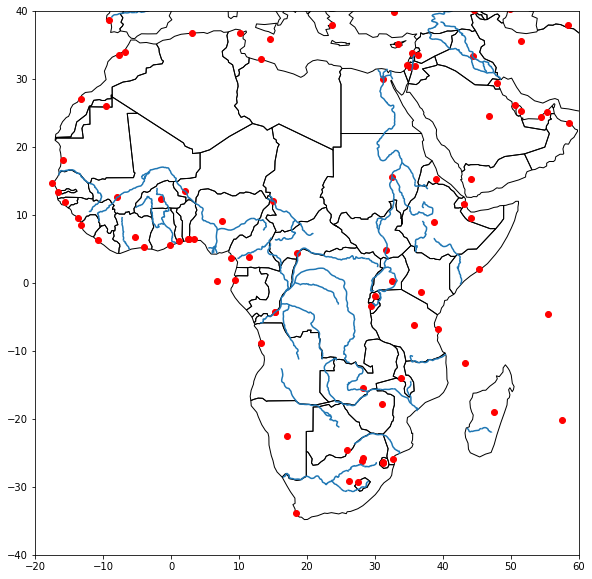

In [28]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

In [36]:
districts = gpd.read_file("quartier_paris.geojson") #Reading the administrative districts file

In [37]:
stations = gpd.read_file("velib-disponibilite-en-temps-reel.geojson") #reading the bike share file

In [38]:
type(districts) #Checking the type of data returned for admin district

geopandas.geodataframe.GeoDataFrame

In [40]:
type(stations) #Checking the type of data returned for bike stations

geopandas.geodataframe.GeoDataFrame

In [41]:
districts.head

<bound method NDFrame.head of       n_sq_qu     perimetre  objectid      longueur  c_qu       surface  \
0   750000010   2139.625388        50   2139.535591    10  2.717503e+05   
1   750000016   3283.163371        56   3282.999717    16  3.782522e+05   
2   750000018   4052.729521        58   4052.473226    18  7.983894e+05   
3   750000025   3827.253353         7   3827.053421    25  8.265594e+05   
4   750000035   2786.541926        17   2786.448978    35  4.173351e+05   
..        ...           ...       ...           ...   ...           ...   
75  750000075   6399.022082        78   6398.855858    75  1.835720e+06   
76  750000077   3738.454432        80   3738.322949    77  8.065686e+05   
77  750000061  12452.253931        64  12451.602252    61  6.383888e+06   
78  750000070   6005.520389        73   6005.408909    70  1.653715e+06   
79  750000071   5176.406895        74   5176.316067    71  1.089226e+06   

      n_sq_ar  c_quinsee                  l_qu  c_ar  \
0   750000003

In [42]:
stations.head

<bound method NDFrame.head of       nbfreeedock  nbebike     station_state  maxbikeoverflow station_type  \
0              44        0         Operative               55          yes   
1              44        1         Operative                0          yes   
2               0        2         Operative               41           no   
3              16        1         Operative                0          yes   
4              14        0         Operative                0          yes   
...           ...      ...               ...              ...          ...   
1354            0        1         Operative               36          yes   
1355           34        1         Operative               39          yes   
1356           22        0  Work in progress                0          yes   
1357           20        0  Work in progress                0          yes   
1358           19        0  Work in progress                0          yes   

     overflowactivation station_c

In [43]:
#We can observe from the geometry column that the districts dataframe is composed of polygons and the stations dataframe is composed of points. 

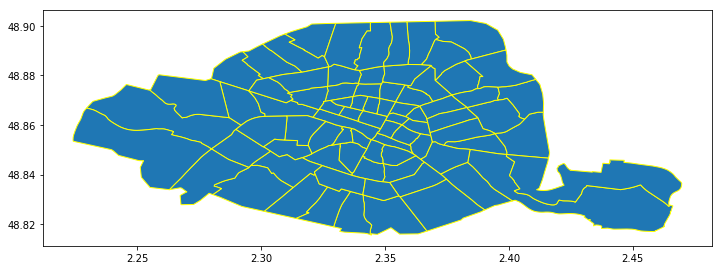

In [58]:
ax=districts.plot(edgecolor='yellow', figsize=(12,6))

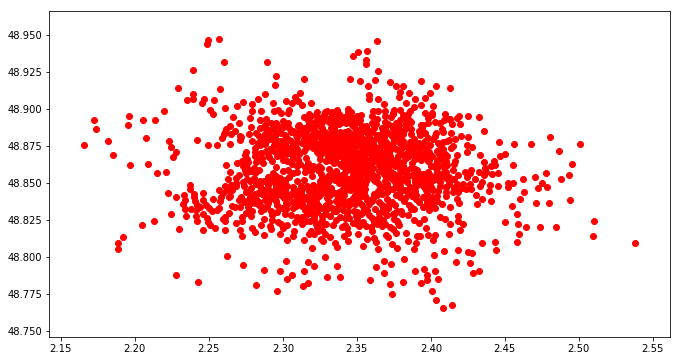

In [48]:
image2=stations.plot(color='red', figsize=(12,6))

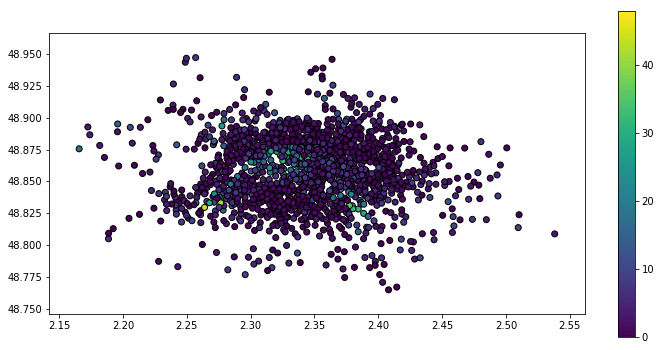

In [57]:
stations.plot(edgecolor='k', column='nbbike', figsize=(12,6), legend='true')

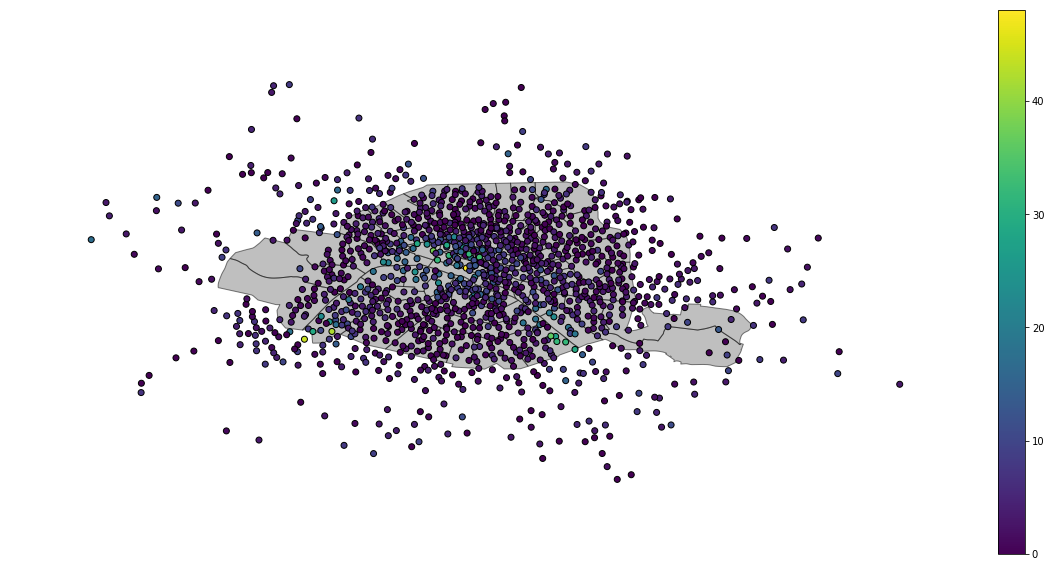

In [88]:
ax=districts.plot(edgecolor='black', figsize=(20,10), facecolor='grey', alpha=.5)
stations.plot(ax=ax, edgecolor='black', column='nbbike', figsize=(12,6), legend='true')
ax.set_axis_off()

In [81]:
districts.sort_values(by="surface") #This shows that the largest district is Picpus. 

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
74,750000005,1866.982041,45,1866.913442,5,1.880122e+05,750000002,7510201,Gaillon,2,"POLYGON ((2.336320212305949 48.8679713890312, ..."
14,750000012,1861.804114,52,1861.724892,12,2.133164e+05,750000003,7510304,Sainte-Avoie,3,"POLYGON ((2.358217680434204 48.86122492296987,..."
61,750000006,2058.472959,46,2058.393947,6,2.435508e+05,750000002,7510202,Vivienne,2,"POLYGON ((2.341232901135717 48.86580234954633,..."
73,750000004,2147.817602,44,2147.734559,4,2.694568e+05,750000001,7510104,Place-Vendôme,1,"POLYGON ((2.331944969393234 48.86491285292422,..."
0,750000010,2139.625388,50,2139.535591,10,2.717503e+05,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."
...,...,...,...,...,...,...,...,...,...,...,...
39,750000063,7447.041546,66,7446.789258,63,3.086718e+06,750000016,7511603,Porte-Dauphine,16,"POLYGON ((2.270984460582897 48.87877430214068,..."
25,750000062,11962.438594,65,11961.948852,62,5.477898e+06,750000016,7511602,Muette,16,"POLYGON ((2.245624861250342 48.87635522218429,..."
49,750000045,18427.822238,27,18426.599903,45,5.970921e+06,750000012,7511201,Bel-Air,12,"POLYGON ((2.413879624310719 48.83357143882335,..."
77,750000061,12452.253931,64,12451.602252,61,6.383888e+06,750000016,7511601,Auteuil,16,"POLYGON ((2.249224929777843 48.85782761493477,..."


In [82]:
import numpy as np
import matplotlib.pyplot as plt

(array([0.02694748, 0.00198874, 0.02525705, 0.02923453, 0.02287055,
        0.01233021, 0.00865104, 0.00407692, 0.00318199, 0.00059662]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <a list of 10 Patch objects>)

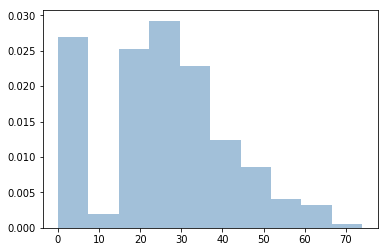

In [87]:
plt.hist(stations.nbedock, normed=True, alpha=0.5,
        color='steelblue',
         edgecolor='none')